Consistency Score (Bowler) = W1 × (Inns / Mat)  + W2 × (Wkts) - W3 × Ave - W4 × Econ - W5 × (SR / 100) + W6 × ((4W + 1.25*5W)) + W7 × (Mdns)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def analyze_and_visualize(df):
    # Select Features for Analysis
    features = ['Mat', 'Inns', 'Overs', 'Mdns', 'Runs', 
                'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W']
    df_analysis = df[features]
    
    # Replace infinities and NaN with 0
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)
    
    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    
    # Visualize Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Features')
    plt.show()
    
    return df_analysis

In [3]:
def calculate_bowler_formula_components(df):
    """
    Calculates the components of the Bowler Consistency Score formula.
    """
    df_components = df.copy()

    # Ensure numeric types for calculations (handle potential NaN from coercion)
    df_components['Inns'] = pd.to_numeric(df_components['Inns'], errors='coerce')
    df_components['Mat'] = pd.to_numeric(df_components['Mat'], errors='coerce')
    df_components['Overs'] = pd.to_numeric(df_components['Overs'], errors='coerce')
    df_components['Wkts'] = pd.to_numeric(df_components['Wkts'], errors='coerce')
    df_components['Ave'] = pd.to_numeric(df_components['Ave'], errors='coerce')
    df_components['Econ'] = pd.to_numeric(df_components['Econ'], errors='coerce')
    df_components['SR'] = pd.to_numeric(df_components['SR'], errors='coerce')
    df_components['4W'] = pd.to_numeric(df_components['4W'], errors='coerce')
    df_components['5W'] = pd.to_numeric(df_components['5W'], errors='coerce')
    df_components['Mdns'] = pd.to_numeric(df_components['Mdns'], errors='coerce')

    # Perform calculations, ensure float division and handle potential NaN values
    df_components['Inns_per_Mat'] = df_components['Inns'].astype(float) / df_components['Mat'].astype(float) # Ensure float division
    df_components['Wkts_per_Overs'] = df_components['Wkts'].astype(float) 
    df_components['Ave_Score'] = df_components['Ave'].astype(float)  # Direct Ave
    df_components['Econ_Rate'] = df_components['Econ'].astype(float)  # Direct Econ
    df_components['SR_per_100'] = df_components['SR'].astype(float) / 100
    df_components['4W5W_per_Inns'] = (df_components['4W'].astype(float) + 1.25 *  df_components['5W'].astype(float)) 
    df_components['Mdns_per_Overs'] = df_components['Mdns'].astype(float) 

    return df_components

In [4]:
data = pd.read_excel("../../cleaned last season/lastseasoniplbowlingg.xlsx")
df = data.copy()
print("Data types of your columns before calculation:")


Data types of your columns before calculation:


In [5]:
numeric_cols = ['Inns', 'Mat', 'Overs', 'Mdns', 'Runs', 'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W', 'Mdns'] # Added Mdns
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Use df here

# Verify data types AFTER explicit conversion
print("\nData types of your columns AFTER explicit numeric conversion:")
print(df.dtypes) # Use df here

# --- Correctly Remove Rows with NaN Values ---
cols_to_check_nan = ['Inns', 'Mat', 'Overs', 'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W', 'Mdns'] # Added Mdns if relevant, keep consistent
print("\nNumber of NaN values BEFORE removing:")
print(df[cols_to_check_nan].isna().sum()) # Check NaN counts in relevant columns before removal

df_cleaned = df.dropna(subset=cols_to_check_nan, how='any') # Use how='any' to drop row if ANY of these cols is NaN
print("\nNumber of rows BEFORE removing NaNs:", len(df))
print("Number of rows AFTER removing NaNs:", len(df_cleaned)) # Print length of df_cleaned


# Calculate bowler formula components using the CLEANED data (df_cleaned)
calculations_with_data = calculate_bowler_formula_components(df_cleaned) # Pass df_cleaned

# Select the component columns for correlation analysis
component_columns = [
    'Inns_per_Mat',
    'Wkts_per_Overs',
    'Ave_Score',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs'  
]

# Calculate the correlation matrix for the components
correlation_matrix = calculations_with_data[component_columns].corr() # Use calculations_with_data

# Display the correlation matrix
print("\nCorrelation Matrix of Bowler Consistency Formula Components (after NaN removal):")
print(correlation_matrix)


Data types of your columns AFTER explicit numeric conversion:
Player                 object
Mat                     int64
Inns                    int64
Overs                 float64
Mdns                    int64
Runs                    int64
Wkts                    int64
Ave                   float64
Econ                  float64
SR                    float64
4W                      int64
5W                      int64
Type                   object
MostCommonPosition      int64
dtype: object

Number of NaN values BEFORE removing:
Inns     0
Mat      0
Overs    0
Wkts     0
Ave      0
Econ     0
SR       0
4W       0
5W       0
Mdns     0
dtype: int64

Number of rows BEFORE removing NaNs: 73
Number of rows AFTER removing NaNs: 73

Correlation Matrix of Bowler Consistency Formula Components (after NaN removal):
                Inns_per_Mat  Wkts_per_Overs  Ave_Score  Econ_Rate  \
Inns_per_Mat        1.000000       -0.403721   0.222133   0.148717   
Wkts_per_Overs     -0.403721        1.0

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_bowler_consistency_components(df_components):
    features = [
        'Inns_per_Mat',
        'Wkts_per_Overs',
        'Ave_Score',
        'Econ_Rate',
        'SR_per_100',
        '4W5W_per_Inns',
        'Mdns_per_Overs'
    ]
    df_analysis = df_components[features].copy() # Use .copy() to avoid SettingWithCopyWarning

    # Replace infinities and NaN with 0 - Handle potential issues from calculations
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)

    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5) # Added fmt and linewidths for better readability
    plt.title('Correlation Matrix of Bowler Consistency Formula Components')
    plt.show()

    return df_analysis




                Inns_per_Mat  Wkts_per_Overs  Ave_Score  Econ_Rate  \
Inns_per_Mat        1.000000       -0.403721   0.222133   0.148717   
Wkts_per_Overs     -0.403721        1.000000  -0.663151  -0.459712   
Ave_Score           0.222133       -0.663151   1.000000   0.605081   
Econ_Rate           0.148717       -0.459712   0.605081   1.000000   
SR_per_100          0.174920       -0.580403   0.942813   0.540569   
4W5W_per_Inns      -0.081732        0.543406  -0.289655  -0.193826   
Mdns_per_Overs     -0.041619        0.422772  -0.139731  -0.131165   

                SR_per_100  4W5W_per_Inns  Mdns_per_Overs  
Inns_per_Mat      0.174920      -0.081732       -0.041619  
Wkts_per_Overs   -0.580403       0.543406        0.422772  
Ave_Score         0.942813      -0.289655       -0.139731  
Econ_Rate         0.540569      -0.193826       -0.131165  
SR_per_100        1.000000      -0.227979       -0.122293  
4W5W_per_Inns    -0.227979       1.000000        0.241248  
Mdns_per_Overs   -0

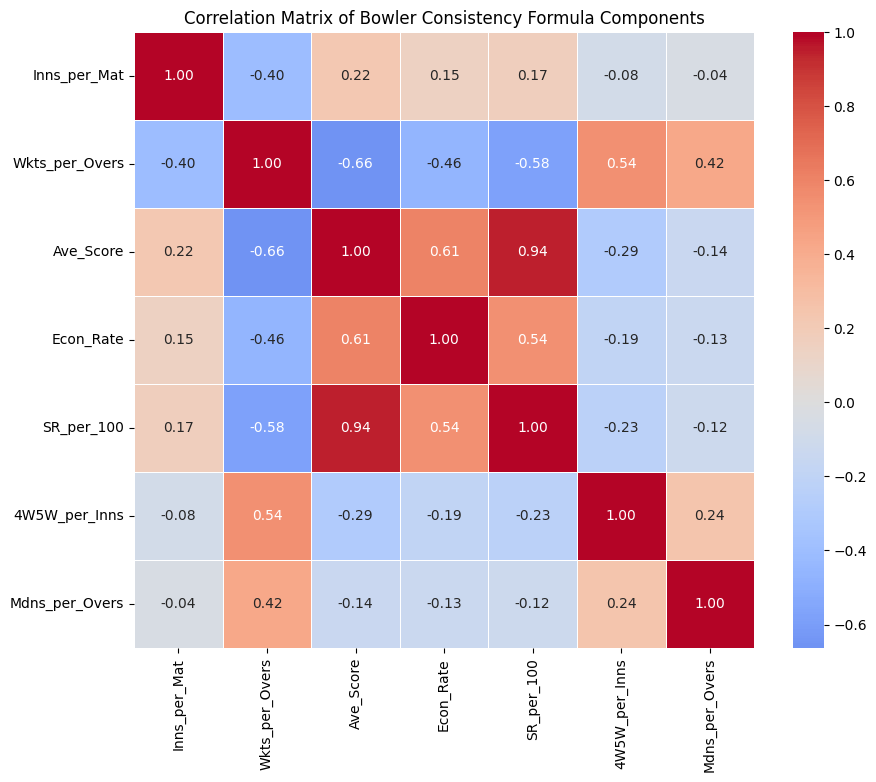

In [7]:
analyzed_df = analyze_bowler_consistency_components(calculations_with_data)


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Assuming calculations_with_data is your DataFrame after computing the derived metrics,
# and that it includes the following component columns:
features = [
    'Inns_per_Mat', 
    'Wkts_per_Overs', 
    'Ave_Score', 
    'Econ_Rate', 
    'SR_per_100', 
    '4W5W_per_Inns',
    'Mdns_per_Overs'
]

#########################################
# 1. Principal Component Analysis (PCA)
#########################################

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# You can use the loadings for PC1 (which explains most variance) as guidance for the weights:
pc1_loadings = loadings['PC1']
# Normalize the PC1 loadings (absolute values) to sum to 1:
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

#########################################
# 2. Analytic Hierarchy Process (AHP)
#########################################

# For AHP, you typically have expert input in the form of a pairwise comparison matrix.
# Here’s an example pairwise comparison matrix for the 7 criteria. 
# (You should adjust these values based on domain expertise.)
pairwise_matrix = np.array([
    [1,     2,     3,     4,     5,     6,     7],
    [1/2,   1,     2,     3,     4,     5,     6],
    [1/3,   1/2,   1,     2,     3,     4,     5],
    [1/4,   1/3,   1/2,   1,     2,     3,     4],
    [1/5,   1/4,   1/3,   1/2,   1,     2,     3],
    [1/6,   1/5,   1/4,   1/3,   1/2,   1,     2],
    [1/7,   1/6,   1/5,   1/4,   1/3,   1/2,   1]
])

# Calculate the principal eigenvector of the pairwise matrix
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
# Normalize to sum to 1
ahp_weights = ahp_weights / ahp_weights.sum()

# Create a Series with these weights for clarity
ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

#########################################
# 3. Optimization-Based Approach
#########################################

# Define a function to calculate the composite consistency score given a set of weights.
def consistency_score(weights, df):
    # weights: array of shape (7,)
    # df: DataFrame containing the metrics in the order of 'features'
    return np.dot(df[features].values, weights)

# Define an objective function.
# In this example, we aim to maximize the variance of the consistency score.
# (Maximizing variance might help differentiate between players.)
def objective(weights, df):
    scores = consistency_score(weights, df)
    # We minimize the negative variance.
    return -np.var(scores)

# Set initial weights (equal distribution)
initial_weights = np.ones(len(features)) / len(features)
# Define bounds if needed (here we constrain weights between 0 and 1)
bounds = [(0, 1)] * len(features)

# Run the optimization
result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()  # Normalize to sum to 1

# Display the optimized weights
optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                     PC1       PC2       PC3       PC4       PC5       PC6  \
Inns_per_Mat    0.205344 -0.062601  0.931568  0.074956  0.053327  0.278628   
Wkts_per_Overs -0.476336  0.269355 -0.127910  0.043584  0.061943  0.816058   
Ave_Score       0.496773  0.294847 -0.101482  0.006225 -0.283197  0.094750   
Econ_Rate       0.383698  0.264305 -0.142883  0.150500  0.856524  0.049673   
SR_per_100      0.467598  0.338991 -0.137766  0.040516 -0.405171  0.256412   
4W5W_per_Inns  -0.281534  0.494125  0.143572  0.728436 -0.110441 -0.336317   
Mdns_per_Overs -0.197538  0.638485  0.213341 -0.661462  0.055900 -0.257126   

                     PC7  
Inns_per_Mat   -0.001035  
Wkts_per_Overs  0.111818  
Ave_Score       0.752839  
Econ_Rate      -0.061260  
SR_per_100     -0.644907  
4W5W_per_Inns   0.006365  
Mdns_per_Overs -0.032095  

Suggested Weights from PCA (based on PC1 loadings):
Ave_Score         0.198010
Wkts_per_Overs    0.189865

In [11]:
import pandas as pd

# Full list of metrics
features = ['Inns_per_Mat', 'Wkts_per_Overs', 
            'Ave_Score', 'Econ_Rate', 'SR_per_100', '4W5W_per_Inns', 'Mdns_per_Overs']

# Updated AHP weights from expert pairwise comparisons
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.354284,
    'Wkts_per_Overs': 0.239928,
    'Ave_Score': 0.158655,
    'Econ_Rate': 0.103625,
    'SR_per_100': 0.067565,
    '4W5W_per_Inns': 0.044769,
    'Mdns_per_Overs': 0.031175
})

# Updated PCA weights derived from PC1 loadings
pca_weights = pd.Series({
    'Ave_Score': 0.198010,
    'SR_per_100': 0.186382,
    'Econ_Rate': 0.152940,
    'Inns_per_Mat': 0.081849,
    '4W5W_per_Inns': 0.112218,
    'Wkts_per_Overs': 0.189865,
    'Mdns_per_Overs': 0.078738
})

# Normalize both weight sets so that they sum to 1
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors to increase the importance of the selected metrics
boost_factors = {
    'Inns_per_Mat': 1.0,
    'Wkts_per_Overs': 2.0,
    'Ave_Score': 1.0,
    'Econ_Rate': 2.0,
    'SR_per_100': 1.0,
    '4W5W_per_Inns': 1.0,
    'Mdns_per_Overs': 1.0
}

# Apply the boost factors to the hybrid weights
hybrid_weights_boosted = hybrid_weights.copy()
for metric in features:
    hybrid_weights_boosted[metric] *= boost_factors[metric]

# Normalize again so the boosted weights sum to 1
hybrid_weights_boosted = hybrid_weights_boosted / hybrid_weights_boosted.sum()

print("Hybrid Weights with Emphasis on Selected Metrics:")
print(hybrid_weights_boosted)


Hybrid Weights with Emphasis on Selected Metrics:
4W5W_per_Inns     0.048390
Ave_Score         0.126895
Econ_Rate         0.176307
Inns_per_Mat      0.202894
Mdns_per_Overs    0.033829
SR_per_100        0.076832
Wkts_per_Overs    0.334853
dtype: float64


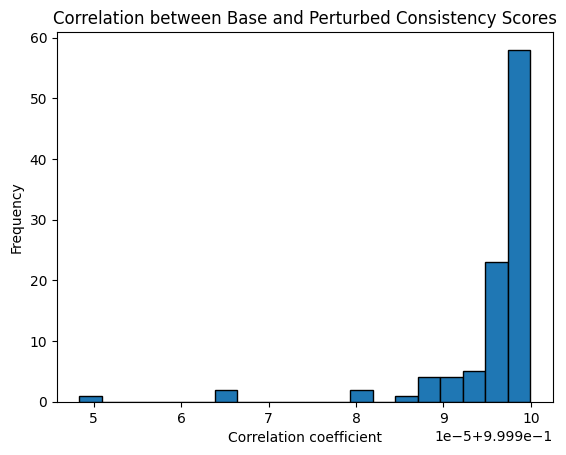

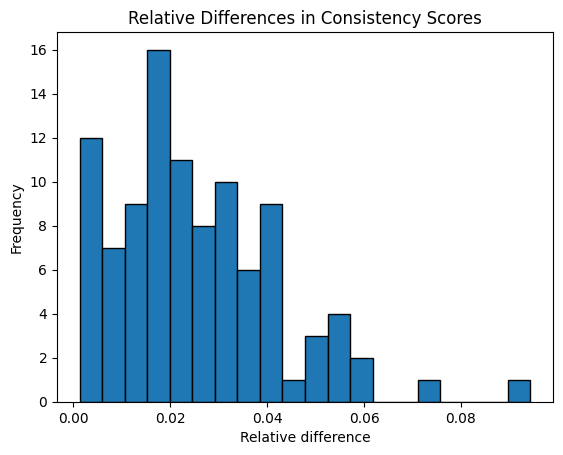

Mean correlation: 0.9999955822980501
Mean relative difference: 0.025296985885253195


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'calculations_with_data' is your DataFrame containing the derived metrics
# and 'hybrid_weights_boosted' is your final weight Series with the index corresponding to:
features = ['Inns_per_Mat', 'Overs_per_Mat', 'Wkts_per_Overs', 
            'Ave_Score', 'Econ_Rate', 'SR_per_100', '4W5W_per_Mat', 'Mdns_per_Overs']

# Define a function to compute the composite consistency score
def compute_consistency_score(df, weights):
    # Make sure the DataFrame columns are in the same order as weights.index
    return np.dot(df[weights.index].values, weights.values)

# Compute the base consistency scores with your nominal weights
base_scores = compute_consistency_score(calculations_with_data, hybrid_weights_boosted)

# Set up sensitivity analysis parameters
n_iterations = 100  # Number of perturbation iterations
perturbation_factor = 0.05  # 5% noise
perturbed_scores_list = []

# Generate perturbed weights and compute the corresponding consistency scores
for i in range(n_iterations):
    # Create random noise: normally distributed noise with 0 mean and 5% standard deviation
    noise = np.random.normal(loc=0, scale=perturbation_factor, size=len(hybrid_weights_boosted))
    
    # Apply the noise multiplicatively to each weight
    perturbed_weights = hybrid_weights_boosted * (1 + noise)
    
    # Renormalize to ensure the weights sum to 1
    perturbed_weights = perturbed_weights / perturbed_weights.sum()
    
    # Compute consistency score with perturbed weights
    perturbed_scores = compute_consistency_score(calculations_with_data, perturbed_weights)
    perturbed_scores_list.append(perturbed_scores)

# For each perturbed set, compute the correlation with the base scores
correlations = [np.corrcoef(base_scores, scores)[0, 1] for scores in perturbed_scores_list]

# Also compute the mean relative difference between perturbed scores and base scores
relative_differences = [
    np.mean(np.abs(scores - base_scores)) / np.mean(np.abs(base_scores))
    for scores in perturbed_scores_list
]

# Plot the distribution of correlation coefficients
plt.hist(correlations, bins=20, edgecolor='k')
plt.title("Correlation between Base and Perturbed Consistency Scores")
plt.xlabel("Correlation coefficient")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of relative differences
plt.hist(relative_differences, bins=20, edgecolor='k')
plt.title("Relative Differences in Consistency Scores")
plt.xlabel("Relative difference")
plt.ylabel("Frequency")
plt.show()

# Print summary statistics
print("Mean correlation:", np.mean(correlations))
print("Mean relative difference:", np.mean(relative_differences))


# FINAL CONSISTENCY SCORE CALCULATION
### Consistency Score (Bowler) = (0.202894 × (Inns / Mat)) + (0.33485 × Wkts) - (0.126895 × Ave) - (0.176307 × Econ) - (0.076832 × (SR / 100)) + (0.048390 × ((4W + 1.25 × 5W))) + (0.033829 × Mdns)

In [2]:
import pandas as pd

# Load the Excel file
file_path = "/Users/pavanbandaru/Downloads/cricket-squad-selection/cleaned all season/bowlerset_ipl.xlsx"  # Update with your actual file path
df = pd.read_excel(file_path)

# Define weights from the updated formula
weights = {
    "Inns_per_Mat": 0.202894,
    "Wkts": 0.33485,
    "Ave": 0.126895,
    "Econ": 0.176307,
    "SR": 0.076832,
    "4W5W": 0.048390,
    "Mdns": 0.033829
}

# Compute Inns / Mat
df["Inns_per_Mat"] = df["Inns"] / df["Mat"]

# Compute 4W + 1.25 * 5W
df["4W5W"] = df["4W"] + 1.25 * df["5W"]

# Compute Consistency Score
df["Consistency_Score"] = (
    weights["Inns_per_Mat"] * df["Inns_per_Mat"] +
    weights["Wkts"] * df["Wkts"] -
    weights["Ave"] * df["Ave"] -
    weights["Econ"] * df["Econ"] -
    weights["SR"] * (df["SR"] / 100) +
    weights["4W5W"] * df["4W5W"] +
    weights["Mdns"] * df["Mdns"]
) 

# Save the updated file
output_file = "bowler[_data_ipl_form_score.xlsx"
df.to_excel(output_file, index=False)

print(f"Updated Excel file saved as {output_file}")


Updated Excel file saved as bowler[_data_ipl_form_score.xlsx


In [2]:
import pandas as pd

# Load the Excel file
file_path = "/Users/pavanbandaru/Downloads/cricket-squad-selection/cleaned last season/lastseasoniplbowlingg.xlsx"  
df = pd.read_excel(file_path)

# Convert relevant columns to numeric
numeric_cols = ["Inns", "Mat", "Wkts", "Ave", "Econ", "SR", "4W", "5W", "Mdns"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Compute Inns / Mat
df["Inns_per_Mat"] = df["Inns"] / df["Mat"]

# Compute 4W + 1.25 * 5W
df["4W5W"] = df["4W"] + 1.25 * df["5W"]

# AHP Weights for Bowler
ahp_weights = {
    "Inns_per_Mat": 0.354284,
    "Wkts": 0.239928,
    "Ave": 0.158655,
    "Econ": 0.103625,
    "SR": 0.067565,
    "4W5W": 0.044769,
    "Mdns": 0.031175
}

# PCA Weights for Bowler
pca_weights = {
    "Inns_per_Mat": 0.081849,
    "Wkts": 0.189865,
    "Ave": 0.198010,
    "Econ": 0.152940,
    "SR": 0.186382,
    "4W5W": 0.112218,
    "Mdns": 0.078738
}

# Compute FORM_AHP_BOWLER
df["FORM_AHP_BOWLER"] = (
    ahp_weights["Inns_per_Mat"] * df["Inns_per_Mat"] +
    ahp_weights["Wkts"] * df["Wkts"] -
    ahp_weights["Ave"] * df["Ave"] -
    ahp_weights["Econ"] * df["Econ"] -
    ahp_weights["SR"] * (df["SR"] / 100) +
    ahp_weights["4W5W"] * df["4W5W"] +
    ahp_weights["Mdns"] * df["Mdns"]
)

# Compute FORM_PCA_BOWLER
df["FORM_PCA_BOWLER"] = (
    pca_weights["Inns_per_Mat"] * df["Inns_per_Mat"] +
    pca_weights["Wkts"] * df["Wkts"] -
    pca_weights["Ave"] * df["Ave"] -
    pca_weights["Econ"] * df["Econ"] -
    pca_weights["SR"] * (df["SR"] / 100) +
    pca_weights["4W5W"] * df["4W5W"] +
    pca_weights["Mdns"] * df["Mdns"]
)

# Save the updated file
output_file = "bowler_AHP_PCA_score_ipl.xlsx"
df.to_excel(output_file, index=False)

print(f"Updated Excel file saved as {output_file}")


Updated Excel file saved as bowler_AHP_PCA_score_ipl.xlsx
